<a href="https://colab.research.google.com/github/Bimal-Sethi/8th-Sem-BTP/blob/main/Drowsiness_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [71]:
from PIL import Image, ImageOps
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv1D, MaxPool1D, Dense, Flatten, Dropout
import numpy as np

In [72]:
zip_path = "drive/MyDrive/open-closed-eyes.zip"
with ZipFile(zip_path) as myzip:
    files_in_zip = myzip.namelist()

In [73]:
data = []
labels = []

with ZipFile(zip_path) as myzip:
    for i in range(0, 24000):
        with myzip.open(files_in_zip[i]) as myfile:
            img = Image.open(myfile)
            img = img.resize((90,90))
            data.append(np.array(img))
            labels.append(0)

    for i in range(24000, 48000):
        with myzip.open(files_in_zip[i]) as myfile:
            img = Image.open(myfile)
            img = img.resize((90,90))
            data.append(np.array(img))
            labels.append(1)

In [74]:
data = np.array(data)
# data = np.reshape(data, (48000,90,90,1))
labels = np.array(labels)
print(data.shape, labels.shape)

(48000, 90, 90) (48000,)


In [75]:
X_train, X_test_dev, Y_train, Y_test_dev = train_test_split(data, labels, test_size = 0.18, random_state = 42)
X_test, X_dev, Y_test, Y_dev = train_test_split(X_test_dev, Y_test_dev, test_size = 0.5, random_state = 42)

Y_train = to_categorical(Y_train, 2)
Y_test = to_categorical(Y_test, 2)
Y_dev = to_categorical(Y_dev, 2)

print(X_train.shape, X_test.shape, X_dev.shape)
print(Y_train.shape, Y_test.shape, Y_dev.shape)

(39360, 90, 90) (4320, 90, 90) (4320, 90, 90)
(39360, 2) (4320, 2) (4320, 2)


In [76]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=(5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv1D(filters=32, kernel_size=(5), activation='relu'))
model.add(MaxPool1D(pool_size=(2)))
model.add(Dropout(rate=0.25))
model.add(Conv1D(filters=64, kernel_size=(3), activation='relu'))
model.add(Conv1D(filters=64, kernel_size=(3), activation='relu'))
model.add(MaxPool1D(pool_size=(2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2, activation='softmax'))

In [77]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 86, 32)            14432     
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 82, 32)            5152      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 41, 32)            0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 41, 32)            0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 39, 64)            6208      
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 37, 64)            12352     
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 18, 64)           

In [79]:
epochs = 100
history = model.fit(X_train, Y_train, batch_size=32768, epochs=epochs, validation_data=(X_dev, Y_dev))

Epoch 1/100
2/2 [==============================] - 1s 328ms/step - loss: 35.1903 - accuracy: 0.4769 - val_loss: 9.3603 - val_accuracy: 0.5067
Epoch 2/100
2/2 [==============================] - 1s 157ms/step - loss: 17.3846 - accuracy: 0.5113 - val_loss: 4.3045 - val_accuracy: 0.5319
Epoch 3/100
2/2 [==============================] - 1s 160ms/step - loss: 6.3829 - accuracy: 0.5491 - val_loss: 0.7482 - val_accuracy: 0.6477
Epoch 4/100
2/2 [==============================] - 1s 153ms/step - loss: 3.6064 - accuracy: 0.5629 - val_loss: 0.7684 - val_accuracy: 0.6127
Epoch 5/100
2/2 [==============================] - 1s 148ms/step - loss: 2.3668 - accuracy: 0.5734 - val_loss: 1.2691 - val_accuracy: 0.5704
Epoch 6/100
2/2 [==============================] - 1s 159ms/step - loss: 1.7477 - accuracy: 0.5954 - val_loss: 0.5857 - val_accuracy: 0.6840
Epoch 7/100
2/2 [==============================] - 1s 152ms/step - loss: 1.1534 - accuracy: 0.6261 - val_loss: 0.5299 - val_accuracy: 0.7558
Epoch 8/100

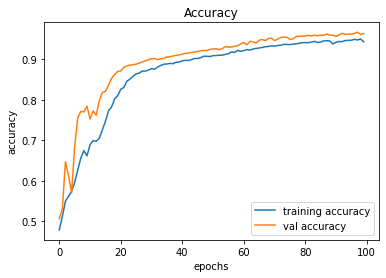

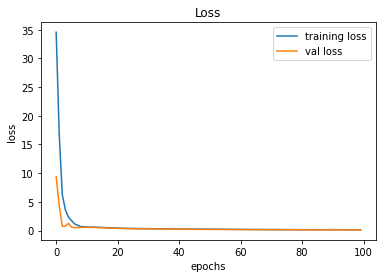

In [80]:
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

0.9666666666666667
[1 0 0 ... 0 1 0]
[1 0 0 ... 0 1 0]
[0 1]


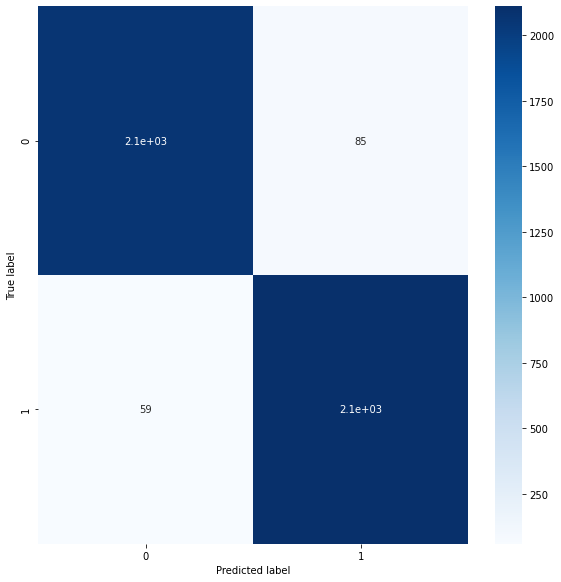

In [83]:
import tensorflow as tf
import pandas as pd
from sklearn.metrics import accuracy_score
import seaborn as sns

y_true=np.argmax(Y_test,axis=-1)
y_pred=np.argmax(model.predict(X_test),axis=-1)

print(accuracy_score(y_true, y_pred))

print(y_true)
print(y_pred)
print(np.unique(y_true))

classes=[i for i in range(2)]

con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = con_mat

con_mat_df = pd.DataFrame(con_mat_norm, index = classes, columns = classes)

figure = plt.figure(figsize=(8,8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

0 0


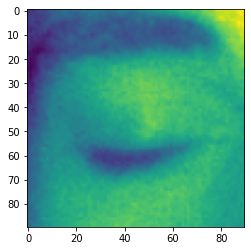

In [86]:
plt.imshow(X_test[32])
print(y_true[32], y_pred[32])

1 1


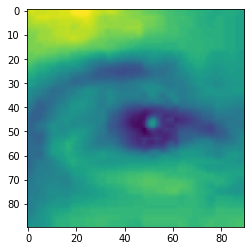

In [87]:
plt.imshow(X_test[46])
print(y_true[46], y_pred[46])

In [88]:
model.save("Drowsy.h5")